# Best Times to Tweets in Healthcare vs. Education

### Read in the csv file

In [3]:
import pandas as pd
df = pd.read_csv(r"C:\Users\nw33659\OneDrive - University of Georgia\CDC-BRFSS\data\clean_local_time_2019-03_2020-02_bbox_state_level.csv")
df

,original_index,id,Month,author.username,author.location,created_at,text,geo.geo.bbox,geo.bbox_min_lon,geo.bbox_min_lat,...,context_annotations,author.id,author.created_at,author.username.1,author.name,author.public_metrics.followers_count,author.public_metrics.following_count,author.public_metrics.listed_count,author.public_metrics.tweet_count,local_time
0,0,1.110000e+18,2019-03,cwolfeeee15,LI,2019-03-31T23:57:12.000Z,Not empty calories if you get drunk,"[-78.912276, 42.826008, -78.79485, 42.966451]",-78.912276,42.826008,...,NaN,7.504665e+08,2012-08-11T02:18:42.000Z,cwolfeeee15,cloud,830,703,0,25957,2019-03-31T19:57:12
1,2,1.110000e+18,2019-03,NutritiveFitnes,"Boston, MA",2019-03-31T23:54:10.000Z,Living healthy one day at a time. One step at...,"[-71.893265, 42.210065, -71.731611, 42.341455]",-71.893265,42.210065,...,"[{""domain"": {""id"": ""65"", ""name"": ""Interests an...",4.358436e+07,2009-05-30T20:05:05.000Z,NutritiveFitnes,NutritiveFitness,2400,2051,90,6040,2019-03-31T19:54:10
2,3,1.110000e+18,2019-03,megblasig,"New York, USA",2019-03-31T23:53:18.000Z,Sunday sundae with brownies AND Girl Scout coo...,"[-73.773602, 42.803191, -73.708782, 42.912676]",-73.773602,42.803191,...,"[{""domain"": {""id"": ""65"", ""name"": ""Interests an...",3.651007e+08,2011-08-30T21:24:08.000Z,megblasig,Meghan Blasig,214,777,2,7248,2019-03-31T19:53:18
3,4,1.110000e+18,2019-03,MamaAvesha,Forest Moon of Endor,2019-03-31T23:49:24.000Z,Give yourself the greatest gift of being there...,"[-82.266777, 41.334955, -82.210195, 41.380744]",-82.266777,41.334955,...,NaN,2.615170e+07,2009-03-24T02:03:27.000Z,MamaAvesha,big MAMA energy,4143,828,102,411996,2019-03-31T19:49:24
4,5,1.110000e+18,2019-03,allinforjc,NaN,2019-03-31T23:44:04.000Z,season 3 of santa clarita diet was so gooooood...,"[-97.662618, 27.578509, -97.202232, 27.895793]",-97.662618,27.578509,...,"[{""domain"": {""id"": ""3"", ""name"": ""TV Shows"", ""d...",7.370000e+17,2016-05-30T16:57:40.000Z,allinforjc,em,431,305,0,7685,2019-03-31T18:44:04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136945,158237,1.220000e+18,2020-02,BenjaminEPark,"Conroe, TX",2020-02-01T00:10:45.000Z,If you eat cookies you bought from a bake sale...,"[-95.679001, 30.23105, -95.3972667, 30.443978]",-95.679001,30.231050,...,"[{""domain"": {""id"": ""65"", ""name"": ""Interests an...",1.297825e+08,2010-04-05T11:27:05.000Z,BenjaminEPark,Benjamin Park,12864,992,191,37969,2020-01-31T18:10:45
136946,158239,1.220000e+18,2020-02,emothickstud,NaN,2020-02-01T00:06:40.000Z,@stalinswombat Bet. You got diet restrictions?,"[-87.940033, 41.644102, -87.523993, 42.0230669]",-87.940033,41.644102,...,NaN,9.824091e+07,2009-12-21T00:37:18.000Z,emothickstud,nefarious aquarius,3237,1628,10,60952,2020-01-31T18:06:40
136947,158240,1.220000e+18,2020-02,drcraigwax,"Mullica Hill, NJ US",2020-02-01T00:03:32.000Z,Black and red burgers\n\nBlack pepper mushroom...,"[-75.268797, 39.7086877, -75.180206, 39.7725969]",-75.268797,39.708688,...,"[{""domain"": {""id"": ""65"", ""name"": ""Interests an...",4.895070e+08,2012-02-11T16:06:58.000Z,drcraigwax,Craig M. Wax D.O.,22010,6044,355,55980,2020-01-31T19:03:32
136948,158241,1.220000e+18,2020-02,TadayoZai,💰,2020-02-01T00:01:42.000Z,"I wanna fat ass, but don’t wanna gain weight 😔","[-118.668404, 33.704538, -118.155409, 34.337041]",-118.668404,33.704538,...,NaN,7.220000e+17,2016-04-18T23:53:36.000Z,TadayoZai,Tadayozai,197,149,0,8208,2020-01-31T16:01:42


### Convert the "Created At" field into a datetime data type, extract the day of the week, and map it onto a new column called "weekdays"

In [13]:
import datetime

df1 = df.copy()

df1['local_time'] = pd.to_datetime(df1['local_time'])
value = df1['local_time']
        
def weekday(date):
    if date.weekday() == 0:
        return 'Monday'
    elif date.weekday() == 1:
        return 'Tuesday'
    elif date.weekday() == 2:
        return 'Wednesday'
    elif date.weekday() == 3:
        return 'Thursday'
    elif date.weekday() == 4:
        return 'Friday'
    elif date.weekday() == 5:
        return 'Saturday'
    else:
        return 'Sunday'

df1["weekdays"] = value.map(weekday)
df1['weekdays']

0         Sunday
1         Sunday
2         Sunday
3         Sunday
4         Sunday
           ...  
136945    Friday
136946    Friday
136947    Friday
136948    Friday
136949    Friday
Name: weekdays, Length: 136950, dtype: object

### Extract the time and map it onto a new column called "time"

In [14]:
df2 = df1.copy()

def time(date):
    time2 = date.time()
    return time2

df2["time"] = value.map(time)
df2['time']

0         19:57:12
1         19:54:10
2         19:53:18
3         19:49:24
4         18:44:04
            ...   
136945    18:10:45
136946    18:06:40
136947    19:03:32
136948    16:01:42
136949    16:00:28
Name: time, Length: 136950, dtype: object

### Group the times into hourly buckets and map it onto a new column called "time groups"

In [15]:
df3 = df2.copy()

def time_groups(time):
    if time >= datetime.time(0,0) and time <= datetime.time(1,0):
        return '12AM-1AM'
    elif time >= datetime.time(1,0) and time <= datetime.time(2,0):
        return '1AM-2AM'
    elif time >= datetime.time(2,0) and time <= datetime.time(3,0):
        return '2AM-3AM'
    elif time >= datetime.time(3,0) and time <= datetime.time(4,0):
        return '3AM-4AM'
    elif time >= datetime.time(4,0) and time <= datetime.time(5,0):
        return '4AM-5AM'
    elif time >= datetime.time(5,0) and time <= datetime.time(6,0):
        return '5AM-6AM'
    elif time >= datetime.time(6,0) and time <= datetime.time(7,0):
        return '6AM-7AM'
    elif time >= datetime.time(7,0) and time <= datetime.time(8,0):
        return '7AM-8AM'
    elif time >= datetime.time(8,0) and time <= datetime.time(9,0):
        return '8AM-9AM'
    elif time >= datetime.time(9,0) and time <= datetime.time(10,0):
        return '9AM-10AM'
    elif time >= datetime.time(10,0) and time <= datetime.time(11,0):
        return '10AM-11AM'
    elif time >= datetime.time(11,0) and time <= datetime.time(12,0):
        return '11AM-12PM'
    elif time >= datetime.time(12,0) and time <= datetime.time(13,0):
        return '12PM-1PM'
    elif time >= datetime.time(13,0) and time <= datetime.time(14,0):
        return '1PM-2PM'
    elif time >= datetime.time(14,0) and time <= datetime.time(15,0):
        return '2PM-3PM'
    elif time >= datetime.time(15,0) and time <= datetime.time(16,0):
        return '3PM-4PM'
    elif time >= datetime.time(16,0) and time <= datetime.time(17,0):
        return '4PM-5PM'
    elif time >= datetime.time(17,0) and time <= datetime.time(18,0):
        return '5PM-6PM'
    elif time >= datetime.time(18,0) and time <= datetime.time(19,0):
        return '6PM-7PM'
    elif time >= datetime.time(19,0) and time <= datetime.time(20,0):
        return '7PM-8PM'
    elif time >= datetime.time(20,0) and time <= datetime.time(21,0):
        return '8PM-9PM'
    elif time >= datetime.time(21,0) and time <= datetime.time(22,0):
        return '9PM-10PM'
    elif time >= datetime.time(22,0) and time <= datetime.time(23,0):
        return '10PM-11PM'
    elif time >= datetime.time(23,0) and time <= datetime.time(23,59):
        return '11PM-12AM'
    else:
        return 'other'

df3["time groups"] = df3['time'].map(time_groups)
df3

,original_index,id,Month,author.username,author.location,created_at,text,geo.geo.bbox,geo.bbox_min_lon,geo.bbox_min_lat,...,author.username.1,author.name,author.public_metrics.followers_count,author.public_metrics.following_count,author.public_metrics.listed_count,author.public_metrics.tweet_count,local_time,weekdays,time,time groups
0,0,1.110000e+18,2019-03,cwolfeeee15,LI,2019-03-31T23:57:12.000Z,Not empty calories if you get drunk,"[-78.912276, 42.826008, -78.79485, 42.966451]",-78.912276,42.826008,...,cwolfeeee15,cloud,830,703,0,25957,2019-03-31 19:57:12,Sunday,19:57:12,7PM-8PM
1,2,1.110000e+18,2019-03,NutritiveFitnes,"Boston, MA",2019-03-31T23:54:10.000Z,Living healthy one day at a time. One step at...,"[-71.893265, 42.210065, -71.731611, 42.341455]",-71.893265,42.210065,...,NutritiveFitnes,NutritiveFitness,2400,2051,90,6040,2019-03-31 19:54:10,Sunday,19:54:10,7PM-8PM
2,3,1.110000e+18,2019-03,megblasig,"New York, USA",2019-03-31T23:53:18.000Z,Sunday sundae with brownies AND Girl Scout coo...,"[-73.773602, 42.803191, -73.708782, 42.912676]",-73.773602,42.803191,...,megblasig,Meghan Blasig,214,777,2,7248,2019-03-31 19:53:18,Sunday,19:53:18,7PM-8PM
3,4,1.110000e+18,2019-03,MamaAvesha,Forest Moon of Endor,2019-03-31T23:49:24.000Z,Give yourself the greatest gift of being there...,"[-82.266777, 41.334955, -82.210195, 41.380744]",-82.266777,41.334955,...,MamaAvesha,big MAMA energy,4143,828,102,411996,2019-03-31 19:49:24,Sunday,19:49:24,7PM-8PM
4,5,1.110000e+18,2019-03,allinforjc,NaN,2019-03-31T23:44:04.000Z,season 3 of santa clarita diet was so gooooood...,"[-97.662618, 27.578509, -97.202232, 27.895793]",-97.662618,27.578509,...,allinforjc,em,431,305,0,7685,2019-03-31 18:44:04,Sunday,18:44:04,6PM-7PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136945,158237,1.220000e+18,2020-02,BenjaminEPark,"Conroe, TX",2020-02-01T00:10:45.000Z,If you eat cookies you bought from a bake sale...,"[-95.679001, 30.23105, -95.3972667, 30.443978]",-95.679001,30.231050,...,BenjaminEPark,Benjamin Park,12864,992,191,37969,2020-01-31 18:10:45,Friday,18:10:45,6PM-7PM
136946,158239,1.220000e+18,2020-02,emothickstud,NaN,2020-02-01T00:06:40.000Z,@stalinswombat Bet. You got diet restrictions?,"[-87.940033, 41.644102, -87.523993, 42.0230669]",-87.940033,41.644102,...,emothickstud,nefarious aquarius,3237,1628,10,60952,2020-01-31 18:06:40,Friday,18:06:40,6PM-7PM
136947,158240,1.220000e+18,2020-02,drcraigwax,"Mullica Hill, NJ US",2020-02-01T00:03:32.000Z,Black and red burgers\n\nBlack pepper mushroom...,"[-75.268797, 39.7086877, -75.180206, 39.7725969]",-75.268797,39.708688,...,drcraigwax,Craig M. Wax D.O.,22010,6044,355,55980,2020-01-31 19:03:32,Friday,19:03:32,7PM-8PM
136948,158241,1.220000e+18,2020-02,TadayoZai,💰,2020-02-01T00:01:42.000Z,"I wanna fat ass, but don’t wanna gain weight 😔","[-118.668404, 33.704538, -118.155409, 34.337041]",-118.668404,33.704538,...,TadayoZai,Tadayozai,197,149,0,8208,2020-01-31 16:01:42,Friday,16:01:42,4PM-5PM


### Get the value counts of "weekdays"

In [16]:
df3['weekdays'].value_counts()

Wednesday    21659
Tuesday      21397
Thursday     21036
Monday       19841
Friday       19352
Saturday     17034
Sunday       16631
Name: weekdays, dtype: int64

### Get the value counts of "time groups"

In [17]:
df3['time groups'].value_counts()

12PM-1PM     8859
11AM-12PM    8294
1PM-2PM      8237
8PM-9PM      8153
10AM-11AM    7929
9PM-10PM     7856
7PM-8PM      7852
2PM-3PM      7851
6PM-7PM      7728
9AM-10AM     7473
3PM-4PM      7417
4PM-5PM      7326
5PM-6PM      7317
10PM-11PM    6450
8AM-9AM      6279
11PM-12AM    4834
7AM-8AM      4611
12AM-1AM     3266
6AM-7AM      2662
1AM-2AM      1978
5AM-6AM      1472
2AM-3AM      1214
4AM-5AM       924
3AM-4AM       919
other          49
Name: time groups, dtype: int64

### Renamed "time groups" to "time_groups" for manipulation purposes later

In [18]:
df4 = df3.copy()
df5 = df4.rename(index=str, columns={"time groups": "time_groups"})
df5

,original_index,id,Month,author.username,author.location,created_at,text,geo.geo.bbox,geo.bbox_min_lon,geo.bbox_min_lat,...,author.username.1,author.name,author.public_metrics.followers_count,author.public_metrics.following_count,author.public_metrics.listed_count,author.public_metrics.tweet_count,local_time,weekdays,time,time_groups
0,0,1.110000e+18,2019-03,cwolfeeee15,LI,2019-03-31T23:57:12.000Z,Not empty calories if you get drunk,"[-78.912276, 42.826008, -78.79485, 42.966451]",-78.912276,42.826008,...,cwolfeeee15,cloud,830,703,0,25957,2019-03-31 19:57:12,Sunday,19:57:12,7PM-8PM
1,2,1.110000e+18,2019-03,NutritiveFitnes,"Boston, MA",2019-03-31T23:54:10.000Z,Living healthy one day at a time. One step at...,"[-71.893265, 42.210065, -71.731611, 42.341455]",-71.893265,42.210065,...,NutritiveFitnes,NutritiveFitness,2400,2051,90,6040,2019-03-31 19:54:10,Sunday,19:54:10,7PM-8PM
2,3,1.110000e+18,2019-03,megblasig,"New York, USA",2019-03-31T23:53:18.000Z,Sunday sundae with brownies AND Girl Scout coo...,"[-73.773602, 42.803191, -73.708782, 42.912676]",-73.773602,42.803191,...,megblasig,Meghan Blasig,214,777,2,7248,2019-03-31 19:53:18,Sunday,19:53:18,7PM-8PM
3,4,1.110000e+18,2019-03,MamaAvesha,Forest Moon of Endor,2019-03-31T23:49:24.000Z,Give yourself the greatest gift of being there...,"[-82.266777, 41.334955, -82.210195, 41.380744]",-82.266777,41.334955,...,MamaAvesha,big MAMA energy,4143,828,102,411996,2019-03-31 19:49:24,Sunday,19:49:24,7PM-8PM
4,5,1.110000e+18,2019-03,allinforjc,NaN,2019-03-31T23:44:04.000Z,season 3 of santa clarita diet was so gooooood...,"[-97.662618, 27.578509, -97.202232, 27.895793]",-97.662618,27.578509,...,allinforjc,em,431,305,0,7685,2019-03-31 18:44:04,Sunday,18:44:04,6PM-7PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136945,158237,1.220000e+18,2020-02,BenjaminEPark,"Conroe, TX",2020-02-01T00:10:45.000Z,If you eat cookies you bought from a bake sale...,"[-95.679001, 30.23105, -95.3972667, 30.443978]",-95.679001,30.231050,...,BenjaminEPark,Benjamin Park,12864,992,191,37969,2020-01-31 18:10:45,Friday,18:10:45,6PM-7PM
136946,158239,1.220000e+18,2020-02,emothickstud,NaN,2020-02-01T00:06:40.000Z,@stalinswombat Bet. You got diet restrictions?,"[-87.940033, 41.644102, -87.523993, 42.0230669]",-87.940033,41.644102,...,emothickstud,nefarious aquarius,3237,1628,10,60952,2020-01-31 18:06:40,Friday,18:06:40,6PM-7PM
136947,158240,1.220000e+18,2020-02,drcraigwax,"Mullica Hill, NJ US",2020-02-01T00:03:32.000Z,Black and red burgers\n\nBlack pepper mushroom...,"[-75.268797, 39.7086877, -75.180206, 39.7725969]",-75.268797,39.708688,...,drcraigwax,Craig M. Wax D.O.,22010,6044,355,55980,2020-01-31 19:03:32,Friday,19:03:32,7PM-8PM
136948,158241,1.220000e+18,2020-02,TadayoZai,💰,2020-02-01T00:01:42.000Z,"I wanna fat ass, but don’t wanna gain weight 😔","[-118.668404, 33.704538, -118.155409, 34.337041]",-118.668404,33.704538,...,TadayoZai,Tadayozai,197,149,0,8208,2020-01-31 16:01:42,Friday,16:01:42,4PM-5PM


### Define the efficiency scores for the heat map

In [87]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm


days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", 
                "Friday", "Saturday", "Sunday"]
time_frames = ["12AM-1AM", "1AM-2AM", "2AM-3AM", "3AM-4AM", "4AM-5AM", 
               "5AM-6AM", "6AM-7AM", "7AM-8AM", "8AM-9AM", "9AM-10AM",
               "10AM-11AM", "11AM-12PM", "12PM-1PM", "1PM-2PM", "2PM-3PM",
               "3PM-4PM", "4PM-5PM", "5PM-6PM", "6PM-7PM", "7PM-8PM",
               "8PM-9PM", "9PM-10PM", "10PM-11PM", "11PM-12AM"]


def hc_efficiency_score(df, day, times):
    array1 = []
    instance_val = 0
    #for each of the time frames
    for time in times:
        #locate the day of the week and the specific time frame, pull the data
        m1 = df.loc[(df["weekdays"]== day) & (df["time_groups"]== time),
                 ["weekdays", "time_groups"]]
        #If there are no tweets in that time frame
        if m1["time_groups"].count() == 0:
            #instance_val = 0
            #lowest category
            sum1 = 0
        else:
            #Sum the retweets, replies, and favorites and divide by num of tweets
            instance_val =  m1["time_groups"].count()
            #putting the tweets into categorical buckets
            if instance_val >= 1270:
                sum1 = 8
            elif instance_val >= 1170 and instance_val < 1270:
                sum1 = 7
            elif instance_val >= 920 and instance_val < 1170:
                sum1 = 6
            elif instance_val >= 710 and instance_val <920:
                sum1 = 5
            elif instance_val >= 300 and instance_val <710:
                sum1 = 4
            elif instance_val >= 150 and instance_val <300:
                sum1 = 3
            elif instance_val >= 50 and instance_val <150:
                sum1 = 2
            else:
                sum1 = 1
        #array1.append(instance_val)
        array1.append(sum1)
        #print(instance_val)
    return array1

### Heat map for Tweets

[[4, 3, 2, 2, 2, 3, 4, 4, 5, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 8, 8, 7, 6, 5], [4, 3, 3, 2, 2, 3, 4, 5, 6, 6, 6, 7, 8, 8, 6, 7, 7, 6, 7, 8, 8, 7, 6, 5], [4, 3, 3, 2, 3, 3, 4, 5, 6, 7, 7, 8, 8, 7, 6, 7, 7, 6, 7, 7, 8, 8, 6, 5], [4, 4, 3, 2, 2, 3, 4, 5, 6, 7, 8, 7, 8, 8, 7, 6, 6, 6, 6, 7, 7, 7, 6, 4], [4, 4, 3, 2, 2, 3, 4, 5, 6, 7, 7, 7, 8, 6, 7, 6, 6, 6, 6, 6, 6, 6, 5, 4], [4, 3, 3, 2, 2, 3, 3, 4, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 4], [4, 3, 3, 2, 2, 2, 3, 4, 4, 5, 6, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 4]]


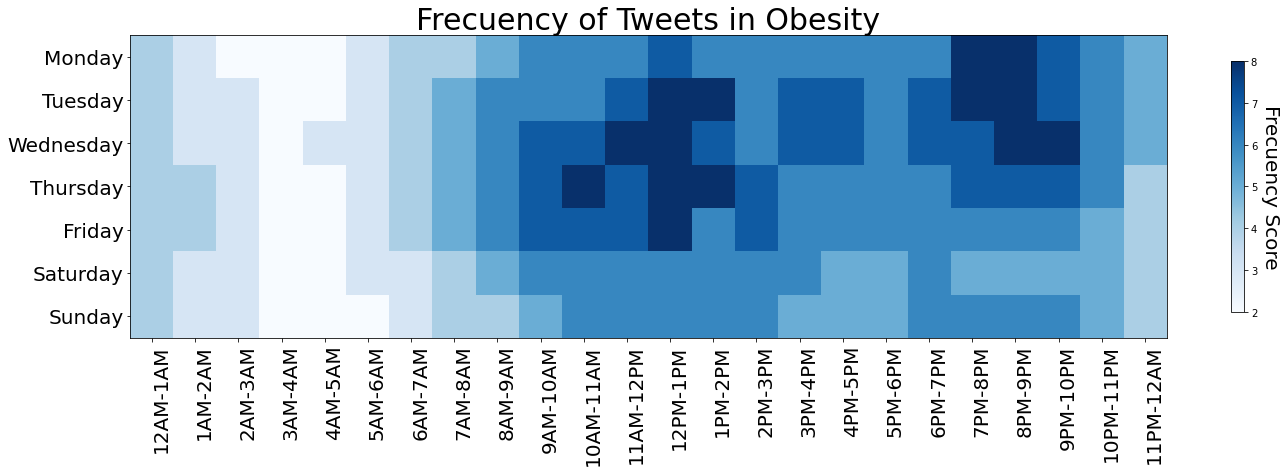

In [104]:
tweet_score = []

m_array = hc_efficiency_score(df5, "Monday", time_frames)
tweet_score.append(m_array)
t_array = hc_efficiency_score(df5, "Tuesday", time_frames)
tweet_score.append(t_array)
w_array = hc_efficiency_score(df5, "Wednesday", time_frames)
tweet_score.append(w_array)
th_array = hc_efficiency_score(df5, "Thursday", time_frames)
tweet_score.append(th_array)
f_array = hc_efficiency_score(df5, "Friday", time_frames)
tweet_score.append(f_array)
st_array = hc_efficiency_score(df5, "Saturday", time_frames)
tweet_score.append(st_array)
s_array = hc_efficiency_score(df5, "Sunday", time_frames)
tweet_score.append(s_array)
print(tweet_score)

fig, ax = plt.subplots(figsize=(20,50))
#(figsize=(width,height))
im = ax.imshow(tweet_score, cmap = cm.Blues)

#get rid of grid lines
ax.grid(False)

#show all ticks...
ax.set_xticks(np.arange(len(time_frames)))
ax.set_yticks(np.arange(len(days_of_week)))
# ... and label them with the respective list entries
ax.set_xticklabels(time_frames, fontsize=20)
ax.set_yticklabels(days_of_week, fontsize=20)

plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")

cbarlabel = "Frecuency Score"

cbar = ax.figure.colorbar(im, ax=ax,shrink=0.07)

cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom", fontsize = 20)

ax.set_title("Frecuency of Tweets in Obesity", fontsize = 30)
fig.tight_layout()
#plt.show()
from PIL import Image
#plt.savefig("time_grid_2019.jpg",dpi=1000,pad_inches=0,bbox_inches="tight")

In [107]:
fig.savefig("time_grid_2019.jpg",dpi=1000,pad_inches=0,bbox_inches="tight")

### How many tweets in each timeframe

In [68]:
tweet_count = []

def tweets(df, day, times):
    array1 = []
    for time in times:
        m1 = df.loc[(df["weekdays"]== day) & (df["time_groups"]== time),
                 ["weekdays","time_groups"]]
        instance_val = m1["time_groups"].count()
        array1.append(instance_val)
    return array1

m_count = tweets(df5, "Monday", time_frames)
print("Monday: ", m_count)
tweet_count.append(m_count)
t_count = tweets(df5, "Tuesday", time_frames)
tweet_count.append(t_count)
print("Tuesday: ", t_count)
w_count = tweets(df5, "Wednesday", time_frames)
tweet_count.append(w_count)
print("Wednesday: ", w_count)
th_count = tweets(df5, "Thursday", time_frames)
tweet_count.append(th_count)
print("Thursday: ", th_count)
f_count = tweets(df5, "Friday", time_frames)
tweet_count.append(f_count)
print("Friday: ", f_count)
st_count = tweets(df5, "Saturday", time_frames)
tweet_count.append(st_count)
print("Saturday: ", st_count)
s_count = tweets(df5, "Sunday", time_frames)
tweet_count.append(s_count)
print("Sunday: ", s_count)

Monday:  [424, 234, 149, 118, 119, 214, 378, 610, 837, 980, 1067, 1092, 1262, 1166, 1160, 1077, 1091, 1077, 1146, 1287, 1384, 1251, 943, 769]
Tuesday:  [494, 284, 155, 133, 130, 251, 466, 754, 983, 1132, 1118, 1224, 1342, 1282, 1155, 1194, 1226, 1149, 1194, 1299, 1337, 1254, 1031, 798]
Wednesday:  [449, 288, 190, 135, 154, 216, 453, 748, 970, 1248, 1181, 1373, 1341, 1259, 1151, 1192, 1191, 1165, 1258, 1232, 1325, 1289, 1080, 762]
Thursday:  [507, 318, 196, 118, 135, 272, 453, 756, 953, 1182, 1288, 1266, 1461, 1286, 1179, 1043, 1052, 1154, 1165, 1204, 1234, 1181, 936, 686]
Friday:  [499, 300, 174, 140, 142, 204, 430, 729, 1027, 1200, 1205, 1193, 1282, 1164, 1193, 1052, 1043, 990, 1011, 982, 1005, 948, 841, 593]
Saturday:  [465, 271, 172, 146, 110, 169, 297, 572, 838, 943, 1081, 1132, 1164, 1045, 1013, 977, 858, 896, 934, 869, 852, 857, 783, 586]
Sunday:  [428, 283, 178, 129, 134, 146, 185, 442, 671, 788, 989, 1014, 1007, 1035, 1000, 882, 865, 886, 1020, 979, 1016, 1076, 836, 640]
